In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [55]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

C:\Users\sanka\AppData\Local\Temp\ipykernel_17176\1748781244.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [56]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [57]:
books['Year-Of-Publication']

0         2002
1         2001
2         1991
3         1999
4         1999
          ... 
271355    1988
271356    1991
271357    2004
271358    1996
271359    2000
Name: Year-Of-Publication, Length: 271360, dtype: object

In [58]:
books['Image-URL-M'][1]

'http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg'

In [59]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [65]:
books['Year-Of-Publication'].value_counts().head(10)

Year-Of-Publication
2002.0    17627
1999.0    17431
2001.0    17359
2000.0    17232
1998.0    15766
1997.0    14890
2003.0    14358
1996.0    14030
1995.0    13546
1994.0    11796
Name: count, dtype: int64

In [66]:
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

In [67]:
print(f"Year range: {books['Year-Of-Publication'].min()} to {books['Year-Of-Publication'].max()}")

Year range: 0.0 to 2050.0


In [68]:
# Check for unrealistic publication years
current_year = 2025
old_books = books[books['Year-Of-Publication'] < 1900]
future_books = books[books['Year-Of-Publication'] > current_year]
print(f"Books before 1800: {len(old_books)}")
print(f"Books from future: {len(future_books)}")

Books before 1800: 4622
Books from future: 12


In [69]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [70]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [71]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [72]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [73]:
ratings['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

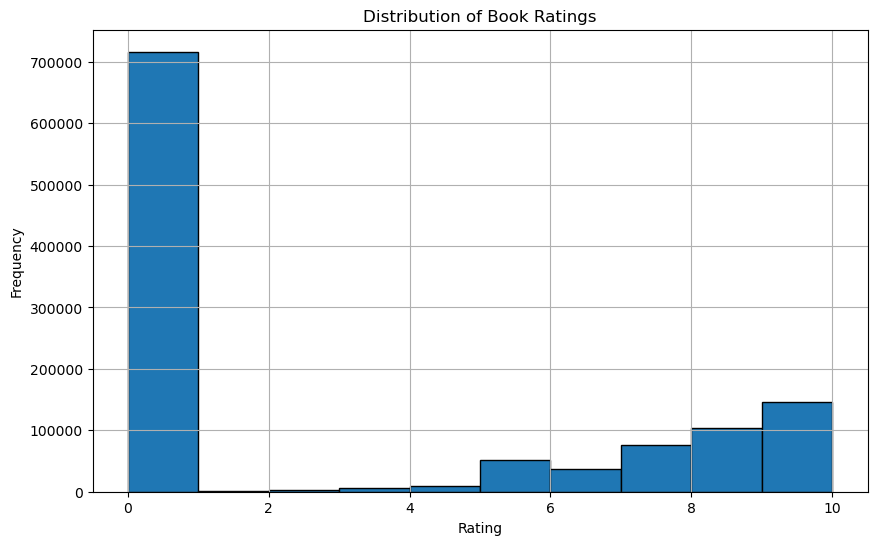

In [74]:
plt.figure(figsize=(10,6))
ratings['Book-Rating'].hist(edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [75]:
print(f"Rating range: {ratings['Book-Rating'].min()} to {ratings['Book-Rating'].max()}")

Rating range: 0 to 10


In [76]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [77]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    3
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [78]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [79]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [80]:
books.duplicated().sum()

np.int64(0)

In [81]:
ratings.duplicated().sum()

np.int64(0)

In [82]:
users.duplicated().sum()

np.int64(0)

## Popularity Based Recommender System

In [83]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [ ]:
# how many times each book got rated
book_popularity = ratings.groupby('ISBN').size()
print("Book popularity distribution:")
print(book_popularity.describe())

Book popularity distribution:
count    340556.000000
mean          3.376185
std          12.436252
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2502.000000
dtype: float64


In [84]:
popular_books = book_popularity[book_popularity >= 20]  
print(f"Books with 20+ ratings: {len(popular_books)}")

Books with 20+ ratings: 7490


In [85]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [86]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [ ]:
# Remove ratings of 0 (not actual rating)
ratings_clean = ratings_with_name[ratings_with_name['Book-Rating'] != 0]
print(f"After removing 0 ratings: {ratings_clean.shape}")

After removing 0 ratings: (383842, 10)


In [88]:
# Remove books with unrealistic years
ratings_clean = ratings_clean[
    (ratings_clean['Year-Of-Publication'] >= 1900) & 
    (ratings_clean['Year-Of-Publication'] <= 2025)
]
print(f"After year filtering: {ratings_clean.shape}")

After year filtering: (378031, 10)


In [89]:
ratings_clean.to_csv('ratings_clean.csv', index=False)

In [92]:
num_rating_df = ratings_clean.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
133362,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
133363,Ã?Â?rger mit Produkt X. Roman.,3
133364,Ã?Â?sterlich leben.,1
133365,Ã?Â?stlich der Berge.,1


In [94]:
avg_rating_df = ratings_clean.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
133362,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
133363,Ã?Â?rger mit Produkt X. Roman.,7.000000
133364,Ã?Â?sterlich leben.,7.000000
133365,Ã?Â?stlich der Berge.,8.000000


In [100]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
133362,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
133363,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
133364,Ã?Â?sterlich leben.,1,7.000000
133365,Ã?Â?stlich der Berge.,1,8.000000


In [101]:
popular_df = popular_df[popular_df['num_ratings']>=150].sort_values('avg_rating',ascending=False).head(50)

In [102]:
popular_df.head()

,Book-Title,num_ratings,avg_rating
44491,Harry Potter and the Goblet of Fire (Book 4),247,9.125506
44510,Harry Potter and the Sorcerer's Stone (Book 1),176,9.062500
44495,Harry Potter and the Order of the Phoenix (Boo...,211,9.047393
44503,Harry Potter and the Prisoner of Azkaban (Book 3),277,9.043321
121676,To Kill a Mockingbird,267,8.977528


In [104]:
popular_df.shape

(50, 3)

In [105]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]

In [107]:
popular_df.head()

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,247,9.125506
2,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,176,9.062500
6,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,211,9.047393
10,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,277,9.043321
13,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,267,8.977528


Selected columns:

- Book-Title = Book name

- Book-Author = Author name

- Image-URL-M = Medium-sized book cover image

- num_ratings = How many people rated it

- avg_rating = Average rating score

In [109]:
print(f"Final popular books shape: {popular_df.shape}")
print(f"Rating range: {popular_df['avg_rating'].min():.2f} to {popular_df['avg_rating'].max():.2f}")
print(f"Rating count range: {popular_df['num_ratings'].min()} to {popular_df['num_ratings'].max()}")

print("\nTop 10 most popular books:")
display(popular_df[['Book-Title', 'Book-Author', 'num_ratings', 'avg_rating']].head(10))


Final popular books shape: (50, 5)
Rating range: 7.78 to 9.13
Rating count range: 151 to 707

Top 10 most popular books:


,Book-Title,Book-Author,num_ratings,avg_rating
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,247,9.125506
2,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,176,9.062500
6,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,211,9.047393
10,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,277,9.043321
13,To Kill a Mockingbird,Harper Lee,267,8.977528
21,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,315,8.936508
23,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,151,8.920530
27,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,205,8.882927
36,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,326,8.840491
39,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,161,8.739130


In [110]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'

In [111]:
popular_df.to_csv('popular_books_recommender.csv', index=False)

## Collaborative Filtering Based Recommender System

- Users who liked X also liked Y

In [144]:
user_activity = ratings.groupby('User-ID').size()
print("User activity distribution:")
print(user_activity.describe())

User activity distribution:
count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
dtype: float64


In [145]:
active_users = user_activity[user_activity >= 20]
print(f"Users with 20+ ratings: {len(active_users)}")

Users with 20+ ratings: 7369


In [146]:
ratings_clean.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001.0,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
13,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003.0,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...


In [162]:
ratings_clean.shape

(378031, 10)

In [163]:
x = ratings_clean.groupby('User-ID').count()['Book-Rating'] > 50
print(x.head())
good_readers = x[x].index
print("\nGood readers index: \n", good_readers)

User-ID
8     False
9     False
12    False
14    False
16    False
Name: Book-Rating, dtype: bool

Good readers index: 
 Index([   254,    638,   1424,   1733,   1903,   2033,   2110,   2276,   2766,
         2891,
       ...
       274004, 274061, 274111, 274301, 275970, 276680, 277427, 278137, 278188,
       278418],
      dtype='int64', name='User-ID', length=1137)


In [188]:
print(f'Users with 50+ ratings: {len(good_readers)}')

Users with 50+ ratings: 1137


In [165]:
filtered_rating = ratings_clean[ratings_clean['User-ID'].isin(good_readers)]

In [166]:
filtered_rating.shape

(149669, 10)

In [167]:
filtered_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974.0,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1155,277427,0060006641,10,"On Writing Well, 25th Anniversary : The Classi...",William Zinsser,2001.0,HarperResource,http://images.amazon.com/images/P/0060006641.0...,http://images.amazon.com/images/P/0060006641.0...,http://images.amazon.com/images/P/0060006641.0...
1159,277427,0060542128,7,When the Storm Breaks,Heather Lowell,2003.0,HarperTorch,http://images.amazon.com/images/P/0060542128.0...,http://images.amazon.com/images/P/0060542128.0...,http://images.amazon.com/images/P/0060542128.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...


In [178]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=30
famous_books = y[y].index

In [189]:
print(f'Books with 30+ ratings from active users: {len(famous_books)}')

Books with 30+ ratings from active users: 220


In [180]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', 'A Bend in the Road',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
       'A Map of the World', 'A Painted House', 'A Prayer for Owen Meany',
       'A Time to Kill',
       ...
       'What Looks Like Crazy On An Ordinary Day', 'When the Wind Blows',
       'Where the Heart Is (Oprah's Book Club (Paperback))',
       'While I Was Gone', 'White Oleander : A Novel',
       'White Oleander : A Novel (Oprah's Book Club)',
       'Wicked: The Life and Times of the Wicked Witch of the West',
       'Wild Animus', 'Wizard and Glass (The Dark Tower, Book 4)',
       '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=220)

In [181]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1215,277427,0316776963,8,Me Talk Pretty One Day,David Sedaris,2001.0,Back Bay Books,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...,http://images.amazon.com/images/P/0316776963.0...
1235,277427,0345413903,10,The Murder Book,Jonathan Kellerman,2003.0,Ballantine Books,http://images.amazon.com/images/P/0345413903.0...,http://images.amazon.com/images/P/0345413903.0...,http://images.amazon.com/images/P/0345413903.0...
1270,277427,0385424736,9,The Rainmaker,John Grisham,1995.0,Doubleday Books,http://images.amazon.com/images/P/0385424736.0...,http://images.amazon.com/images/P/0385424736.0...,http://images.amazon.com/images/P/0385424736.0...
1276,277427,0385504209,8,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
...,...,...,...,...,...,...,...,...,...,...
1030870,276680,0375701524,10,The Hundred Secret Senses,Amy Tan,1998.0,Vintage Books USA,http://images.amazon.com/images/P/0375701524.0...,http://images.amazon.com/images/P/0375701524.0...,http://images.amazon.com/images/P/0375701524.0...
1030875,276680,0375727345,8,House of Sand and Fog,Andre Dubus III,2000.0,Vintage Books,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...,http://images.amazon.com/images/P/0375727345.0...
1030889,276680,0385504209,8,The Da Vinci Code,Dan Brown,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
1030947,276680,0688163165,10,Mystic River,Dennis Lehane,2001.0,William Morrow &amp; Company,http://images.amazon.com/images/P/0688163165.0...,http://images.amazon.com/images/P/0688163165.0...,http://images.amazon.com/images/P/0688163165.0...


```
1,149,780 total ratings (RAW DATA)
    ↓ Remove zeros & bad years
378,031 clean ratings (CLEAN DATA)
    ↓ Keep only expert users (50+ ratings)
149,669 expert ratings (EXPERT DATA)  
    ↓ Keep only books experts frequently rate
10,117 final ratings (GOLD STANDARD DATA)
```

In [182]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [183]:
pt

User-ID,254,638,1424,1733,1903,2033,2110,2276,2766,2891,...,273718,274004,274061,274301,275970,276680,277427,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,9.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"A Child Called \It\"": One Child's Courage to Survive""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Oleander : A Novel (Oprah's Book Club),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wicked: The Life and Times of the Wicked Witch of the West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wild Animus,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
pt.fillna(0,inplace=True)

In [185]:
pt

User-ID,254,638,1424,1733,1903,2033,2110,2276,2766,2891,...,273718,274004,274061,274301,275970,276680,277427,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,9.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Child Called \It\"": One Child's Courage to Survive""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
White Oleander : A Novel (Oprah's Book Club),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wicked: The Life and Times of the Wicked Witch of the West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wild Animus,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
similarity_scores = cosine_similarity(pt)

In [187]:
similarity_scores.shape

(220, 220)

If User A and User B gave similar ratings to multiple books, then books they liked are probably similar to each other.

```
User_123 ratings: Harry Potter=9, LOTR=8, Twilight=3
User_456 ratings: Harry Potter=8, LOTR=9, Twilight=2

Conclusion: Harry Potter and LOTR are similar (both experts loved them)
           Twilight is different (both experts disliked it)
```

**"Take books that book experts frequently rate, see which experts gave similar ratings to multiple books, and use those patterns to recommend similar books to new users."**

In [216]:
def recommend(book_name):
    import numpy as np
    
    # Check if book exists in pt index
    if book_name not in pt.index:
        print("I don't know the book you mentioned")
        return []  # Return empty list instead of string
    
    # index fetch
    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Year-Of-Publication'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Publisher'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data


In [222]:
# Testing
recommendations = recommend('1984')

if recommendations == []:
    print()
else:
    print("Books similar to 'Harry Potter and the Chamber of Secrets':")
    for i, (title, author, year, publisher, image) in enumerate(recommendations, 1):
        print(f"{i}. {title} by {author} in {int(year)}, {publisher} - {image}")


Books similar to 'Harry Potter and the Chamber of Secrets':
1. Animal Farm by George Orwell in 2004, Signet - http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg
2. Brave New World by Aldous Huxley in 1989, Harpercollins - http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg
3. The Handmaid's Tale by Margaret Atwood in 1989, Fawcett Books - http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg
4. The Catcher in the Rye by J.D. Salinger in 1991, Little, Brown - http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg


In [209]:
pickle.dump(popular_df,open('popular.pkl','wb'))

In [210]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993.0,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [211]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))